# Task 4.9 Part 2

In [1]:
#Import visualizations and analysis libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plot
import seaborn as sns
import scipy

In [2]:
#import pickle file
df_ords_prods_merged=pd.read_pickle(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/orders_products_aggregated_data.pkl')

It is required to provide instacart senior management and stakeholders with descriptive findings about sales. Create a histogram for order_hour_of_day column. In a markdown cell beneath your hisogram, describe what the histogram demonstrates.

Text(0, 0.5, 'Frequency')

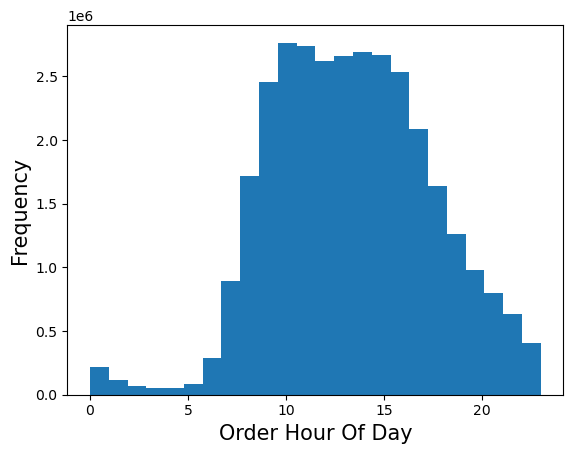

In [3]:
#create histogram
hist = df_ords_prods_merged['order_hour_of_day'].plot.hist(bins = 24) #24 hours in day 
plot.xlabel("Order Hour Of Day", fontsize=15)
plot.ylabel("Frequency",fontsize=15)

Insights 
1. This histogram suggests that orders begin picking up at 7am while peaking from 10am to 4pm. Then the steadily drop off until the next morning. But the hours from 10am to 4pm get drastically more orders than other times.

In [4]:
#exporting the Visual 
hist.figure.savefig(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/VIsualizations')

The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

In [5]:
df_ords_prods_merged.head(1)

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,mean_price,spending_flag,median_days,frequency_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New Customer,6.367797,Low spender,20.5,Non-Frequent customer


Text(0.5, 1.0, 'Number of Orders by Loyalty')

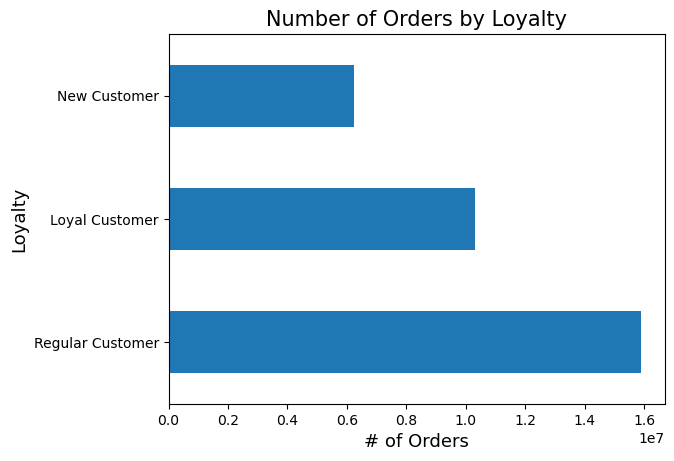

In [6]:
#create a bar chart
bar= df_ords_prods_merged['loyalty_flag'].value_counts()
bar= bar.plot(kind='barh') 
plot.xlabel("# of Orders", fontsize=13)
plot.ylabel("Loyalty", fontsize=13)  
plot.title("Number of Orders by Loyalty", fontsize=15)

Insights 
1. Regular customers make up most of the instacart users. But loyal customers outweight the new customers 2:1. This suggests the growth rate is high. 

In [7]:
path=r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/VIsualizations'

In [8]:
#export the visualization
bar.figure.savefig(os.path.join(path,'loyalty_number.png'))

Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

In [35]:
#Make a sample Data
np.random.seed(4)
dev=np.random.rand(len(df_ords_prods_merged))<=.7

In [36]:
#store 70% of the sample data in a dataframe labeled 'big'
big=df_ords_prods_merged[dev]

In [37]:
#store 30% of the sample data in a dataframe labeled 'small'
small=df_ords_prods_merged[~dev]

In [38]:
#count the number of rows
len(big)+len(small)

32434212

In [13]:
len(df_ords_prods_merged)

32434212

In [39]:
#create a subset of the dataset only containing the columns 'prices' and 'order hour of day'
df=small[['prices','order_hour_of_day']]

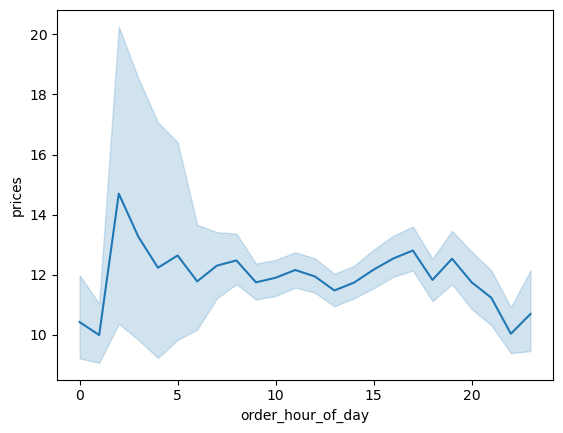

In [40]:
#create a line graph becuase line graphs are usually the best visualization for temporal analysis
line_price_hour=sns.lineplot(data=df_ords_prods_merged,x='order_hour_of_day',y='prices')

Insights 
1. There is a spike in orders at around 2AM, but then orders are most level for the rest of the day, until finally dropping off after 8PM. 

Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:
In a markdown cell beneath your line chart, describe what the line chart shows.

Text(0.5, 1.0, 'Number of Users by Marital Status')

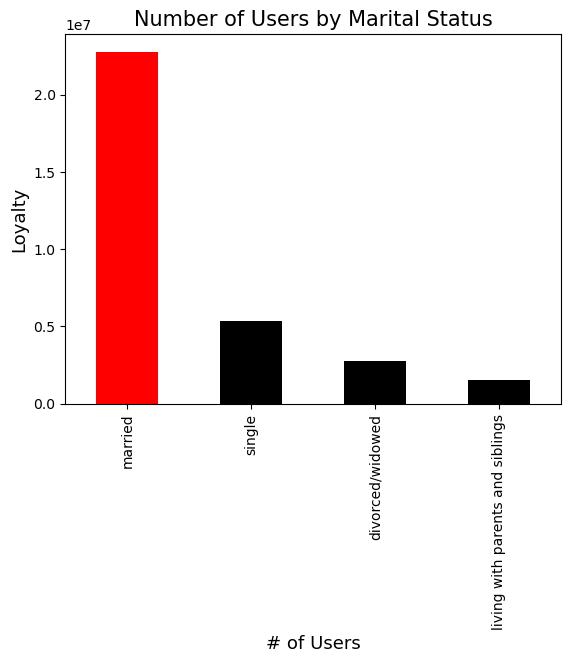

In [29]:
#create bar chart to find the distribution of marital status from 'fam_status'
marital_status = df_ords_prods_merged['fam_status'].value_counts().plot.bar(color = ['red', 'black', 'black', 'black'])
plot.xlabel("# of Users", fontsize=13)
plot.ylabel("Loyalty", fontsize=13)  
plot.title("Number of Users by Marital Status", fontsize=15)

In [25]:
df_ords_prods_merged=pd.read_pickle(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /02 Data/Prepared Data/df_ords_prods_merged2.pkl')

In [31]:
#export the visualization 
marital_status.figure.savefig(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/VIsualizations')

Insights
1. Married users maker up the majority of Instacart users


In [45]:
#Create a subset of 'n_dependents' and 'age'
df_2=small[['n_dependants','age']]

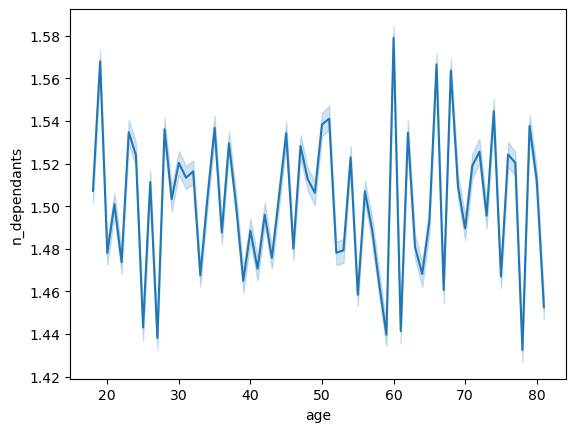

In [46]:
#create line plot with 'age' on x-axis and 'n_dependants'
line_dependants_age=sns.lineplot(data=df_2,x='age',y='n_dependants')

Insights
1. There seems to be no correlation between age and n_dependants 


In [51]:
#Export the visualisation 
line_dependants_age.figure.savefig(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/VIsualizations')

#### You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

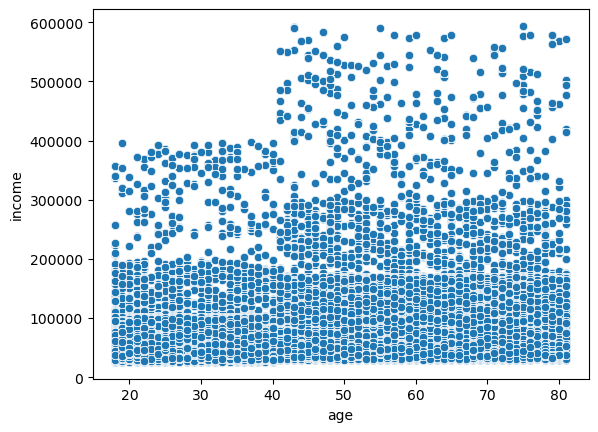

In [53]:
#create scatterplots
age_income_scatter_plot=sns.scatterplot(x='age',y='income',data=df_ords_prods_merged)

Insights
1. It seems that after age 40 there are suddenly a few individuals with incomes higher than 400,000.

In [55]:
#Export the visualization
age_income_scatter_plot.figure.savefig(r'/Users/ritviksolanki/Desktop/Instacart Basket Analysis /04 Analysis/VIsualizations')

In [57]:
df_ords_prods_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32434212 entries, 0 to 32434211
Data columns (total 34 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 int64   
 2   order_number            int64   
 3   order_dow               int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  _merge                  category
 14   price_range_loc        object  
 15  price_range_loc         object  
 16  busiest_day             object  
 17  busiest_days            object  
 18  busiest_period_of_day   object  
 19  max_order               int64   
 20  loyalty_flag            object  
 21  mean_p